# **RAAN UK F2F Guided Data Challenge -- shortened** 


Welcome to the Roche UK DSC guided data challenge! If you are completely new to the world of data science we hope this challenge will give you the guidance and support you need to kick-start your data science journey. If you consider yourself a guru we hope this challenge provides some prompts for you to push your knowledge to the next level and gets you thinking about ways to advance your skill sets. 

This challenge has been written with no expectation of having prior python experience and all the code you will need can be found in the links provided. So if you get stuck with any programming please don't hesitate to ask your team members and supervisors for help. We're all learning together! 
For our challenge today imagine you have been handed a large dataset of digitized images of FNAs (fine needle aspirate) of a breast mass and tasked to predict whether or not an image contains benign or malignant cancer cells. Being the savvy data analysts you all are you decide to employ a machine learning solution.

By the time you finish this challenge, you will be able to :


* Establish a baseline model using SVM, Decision Tree 
* Program in Python!
 

 This is the shorter version of the data challenge you can read through all the steps that we have kept in, but the main aim is to have a go at some different modelling techniques. 

 Some of the steps already done that you can have an attempt at if you would like to take this challenge home: 

* Load the data, understand what is in it and clean datasets. 
* Visualise data 
* Split data using test/train split
* How to improve a base machine learning model using Feature engineering Hyperparameter optimisation.



### Load Packages 

This Python 3 environment comes with many helpful analytics libraries installed. It is defined by the [kaggle/python docker image](https://github.com/kaggle/docker-python). For example, here are several helpful packages to load in which we will have to use later on. 
Run the code below (by clicking run or pressing Shift+Enter) and check the files are installed by looking in the input directory in  "../input/" directory.
 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings # import warnings library
warnings.filterwarnings('ignore') # ignore all warnings
# Any results you write to the current directory are saved as output.

### Loading the Data
To get started we first need to access our dataset which you should have been sent in the form of a csv file. Upload this file to colab by using the File tab on the left, and press the "upload" button, and specify `data.csv`. Then load it into a dataframe in pandas below using `pd.read_csv()`.


Here are some websites that can help you import a csv file into python: 

[How to import a csv into python using pandas](https://datatofish.com/import-csv-file-python-using-pandas/)

[How to read and write csv files with python](https://stackoverflow.com/questions/41585078/how-do-i-read-and-write-csv-files-with-python)


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/finnrea78/Hackathon/main/data.csv')

### Understanding and viewing the data
Now that we have access to the data we want to be able to see what is inside it, just to check everything is in order and ready to start working with. Since it's quite a large dataset we will save some time by only printing out the first and last 5 observations. Once you manage to do this look through the data and note down anything that looks suspicious. Note that in python that indexing will start from 0 (We start counting from 0 and not 1). We can also look at the statistics of each column in the data by calling the "describe" function.

Helpful links:

[How to view a portion of observations in a python dataset.](https://appdividend.com/2020/05/26/pandas-dataframe-head-method-in-python/) 


In [ ]:
data.head()
# We can similarly look at the last rows with `data.tail()`

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Look at a statistical summary of the data
data.describe(include = 'all')  # Use include = all to return mixed types (e.g. not just numeric columns)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


### A brief aside: working with pandas dataframes

It's worthwhile trying to become comfortable with pandas dataframes, both in terms of selecting data, setting data, and various operations that you can perform on the data. In this way you can, as we shall soon see, remove rows or entire columns with missing values, create new features, and many other things. A link to a quick overview can be found in the official pandas docs: [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html). Have a read, and use the below code box to experiment with selecting and setting data.

In [ ]:
temp_data = data.copy()

# There are two ways to select data, by label and by index. Try them out here


# How about selecting data by boolean values? Try selecting all rows with a radius_mean over 13.37


# Can you create a new column called area_estimated where you estimate the area based off of the radius_mean
# (assuming the area follows the equation for the area of a circle)?



### 4 things you hopefully should have noticed from the summaries:

1)  <b>id</b> cannot be used for classification so should be removed (Discuss why this is with your team)

2)  <b>diagnosis </b>  is the class label, and it is in a string format.

3)  <b> Unnamed: 32 </b> feature includes Nan values and is not needed 

4)  We currently have no other knowledge about which features are necessary to keep.

5) Data exists at different scales; some have a mean of less than 1, some are over 1000!
 

### What do we do with this knowledge? 

Hint 1: Lets make our life easier by making the diagnosis a binary variable (1 for Malignant, 0 for Benign)

[Hint 2: Some columns will need to be dropped](https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/) 

Hint 3: One of these columns will need to be saved 
e.g. y = data.(column you want to keep)

Hint 4: Some models really don't like it when input features are different orders of magnitude (others work perfectly well!)



In [ ]:
# Remap the diagnosis column
d = {"M": 1, "B": 0}
data["diagnosis"] = data["diagnosis"].map(d)


# y includes our labels and x includes our features
y = data.diagnosis                          
list = ['Unnamed: 32','id']
x = data.drop(list, axis = 1)
x.head()

# We will do the rescaling later on, once we've split the data!

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Compare the number of benign vs malignant cases 

Next we would like you to compare the number of benign vs malignant cancer cases using your saved variable and plot the result.

[Working out index value using pandas](https://www.geeksforgeeks.org/python-pandas-index-value_counts/?ref=lbp)

[How to create a seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)



Number of Benign:  357
Number of Malignant :  212


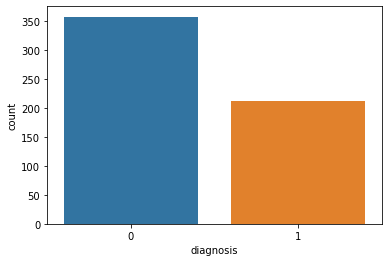

In [ ]:
sns.countplot(x=data["diagnosis"])
B, M = data["diagnosis"].value_counts()

print('Number of Benign: ', B)
print('Number of Malignant : ', M)

## Visualising the data

The ground work is done for the data exploration!!

To understand the hidden patterns, its always good to see big picture first and then dive deep into data. So lets begin analysis or visualization of patterns with our data and then move to the feature level understanding.... This will allow us to gain a better idea of which features have importance to us. In these next few steps you will be making box plots, heatmaps, violin plots and swarm plots!

This data has 3 seperate feature sections: x_mean, x_se and x_worst

Try and seperate the data into 3 seperate sections below. [Hint here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) 


In [ ]:
# splitting into X_mean, X_se and X_worst

x_mean = x.iloc[:,1:11]
x_se = x.iloc[:,11:21]
x_worst = x.iloc[:,21:31]


### Correlation of features

Firstly we will be looking at the correlation( mutual relationship between two or more things) of features to one another.
For this we will be using box plots and heat maps. The importance of this is so that we don't include two features that are strongly correlated
to each other as this can off balance our machine learning algorithm that we will use later. To learn more about this click
 [here](https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e). Later we will just select 1 of the strongly correlated values. This next activity may be quite tricky so try and follow the given documentation and try and work out the step within your team and if all else fails your supervisor can help you!


### Making Boxplots 

Try to create a boxplot to compare two variables. For example radius_mean and texture_mean. [Here is the documentation for creating boxplots.](https://seaborn.pydata.org/generated/seaborn.boxplot.html)


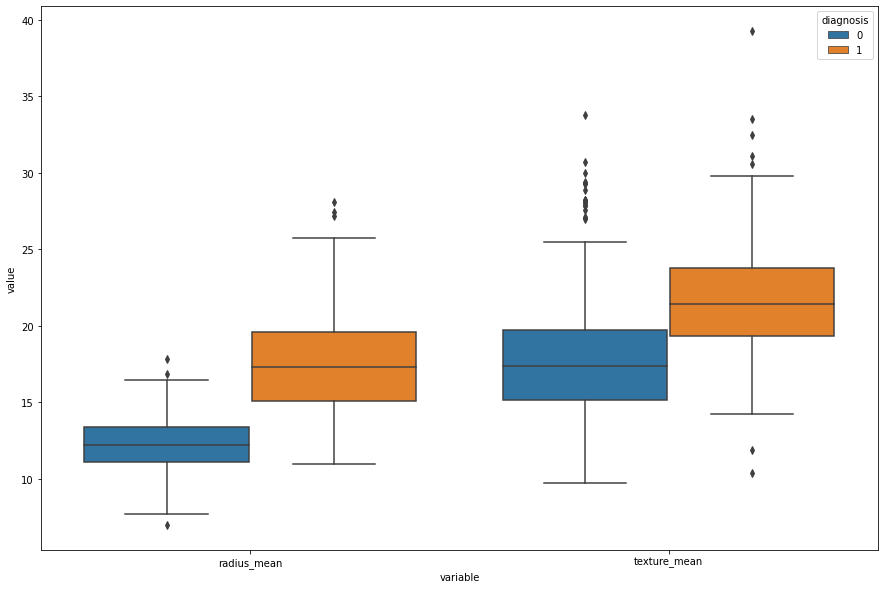

In [ ]:
melted_data = pd.melt(x, id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

### Making Heatmaps 

Try to create heatmaps of the 3 different feature sections you have seperated. [Here is the documentation for creating heatmaps.](https://seaborn.pydata.org/generated/seaborn.heatmap.html)


#### Heatmap for x_mean 

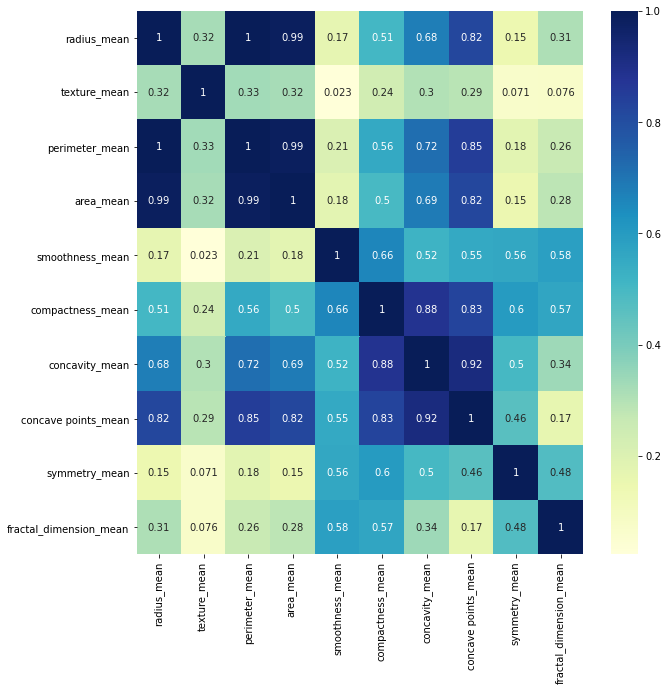

In [ ]:
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(np.abs(x_mean.corr()), cmap="YlGnBu", annot=True)

#### Heatmap for x_se 

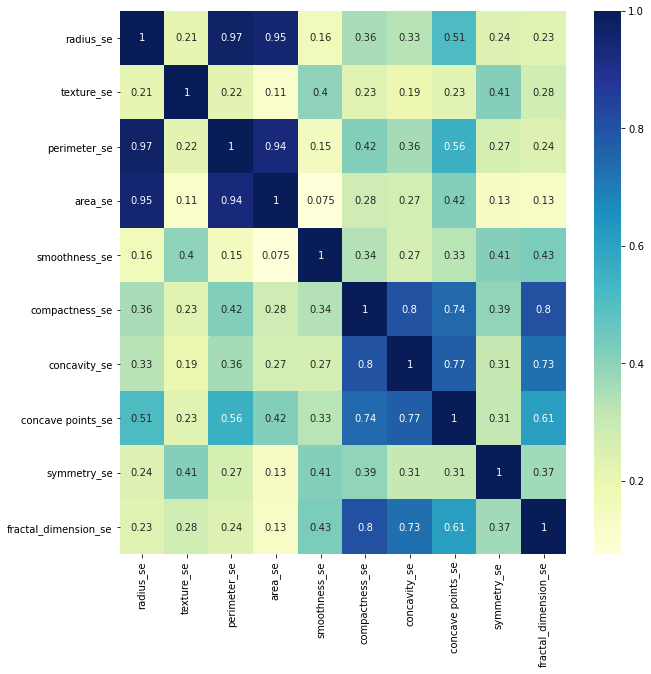

In [ ]:
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(np.abs(x_se.corr()), cmap="YlGnBu", annot=True)
plt.show()

#### Heatmap for x_worst 

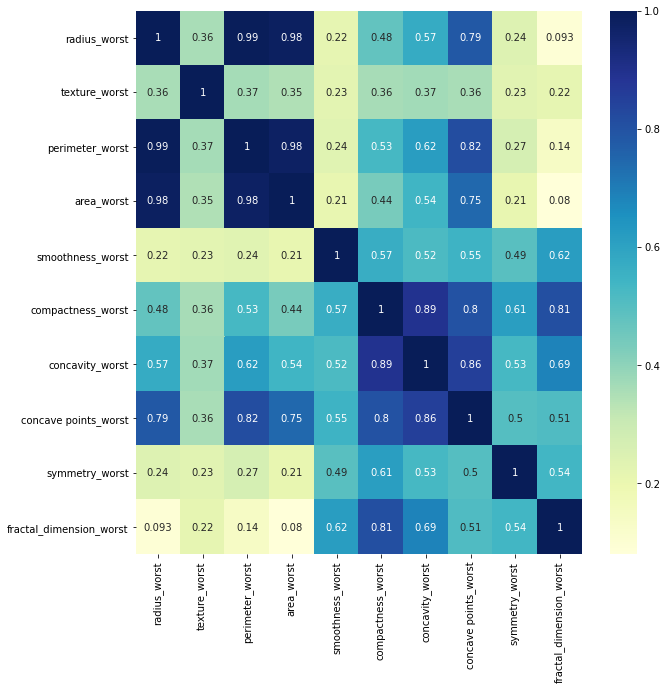

In [ ]:
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(np.abs(x_worst.corr()), cmap="YlGnBu", annot=True)
plt.show()

Lets identify the 10 most correlated features with the diagnosis label:

In [ ]:
cor = np.abs(x.corr())
label_corr = cor.iloc[:, 0]
label_corr.sort_values(ascending=False)[1:11]

concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64

### Violin plots

A [violin plot](https://mode.com/blog/violin-plot-examples/) is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It's used to visualize the distribution of
numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.
Using these plots we can determine which features may be most important to determining benign and malignant cancer cells. Our data will need
 need to be standarized (converted to a common format) for this next step. 

[Hint here for standardization](https://www.askpython.com/python/examples/standardize-data-in-python)

[Hint here for  violin plots](https://seaborn.pydata.org/generated/seaborn.violinplot.html)


#### Violin plot for mean variables 

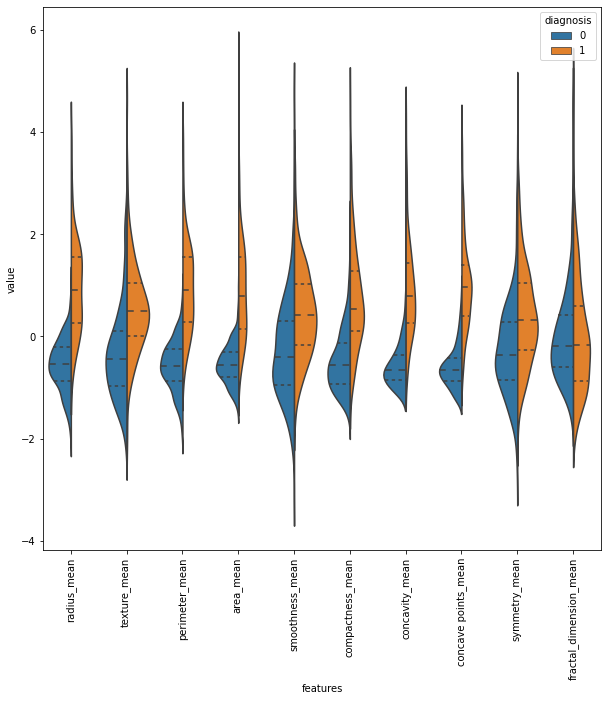

In [ ]:
# first ten features
data_dia = y
data = x_mean
data_standarized = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_standarized.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

#### Violin plot for se variables 

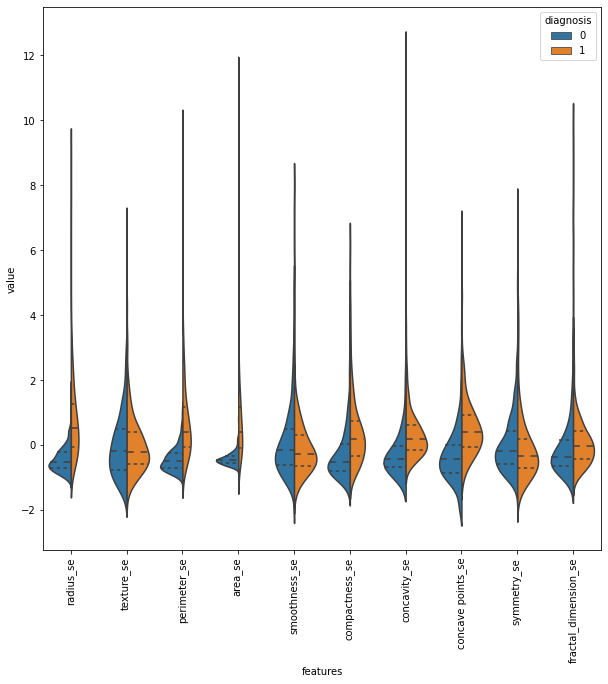

In [ ]:
# next ten features
data_dia = y
data = x_se
data_standarized = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_standarized.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

#### Violin plot for worst variables 

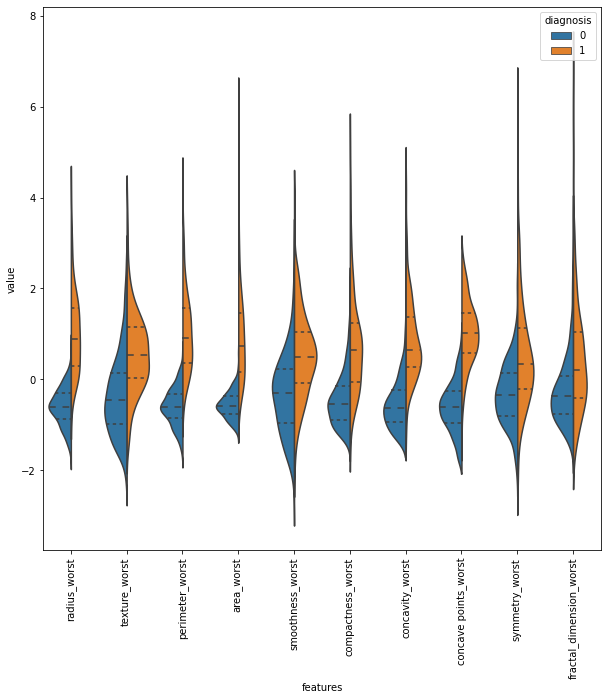

In [ ]:
# next ten features
data_dia = y
data = x_worst
data_standarized = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_standarized.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

### Swarm plots 

The last visualization we will look at is the [swarm plot](https://prvnk10.medium.com/swarm-plot-4728f52b688e). A swarmplot shows all the data points which helps to understand the distribution in a better manner. It also helps to understand how the data is distributed across a categorical attribute and how the continuous variable is varying within a category. This can be used to clearly define any differences between features and hopefully by the end of this step you can start to pick out what we can see to be our most important features. Again you will need to standardize the data for the best results.

[Click here for seaborn documentation on swarm plots](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) 



#### Swarm plot for mean variables 

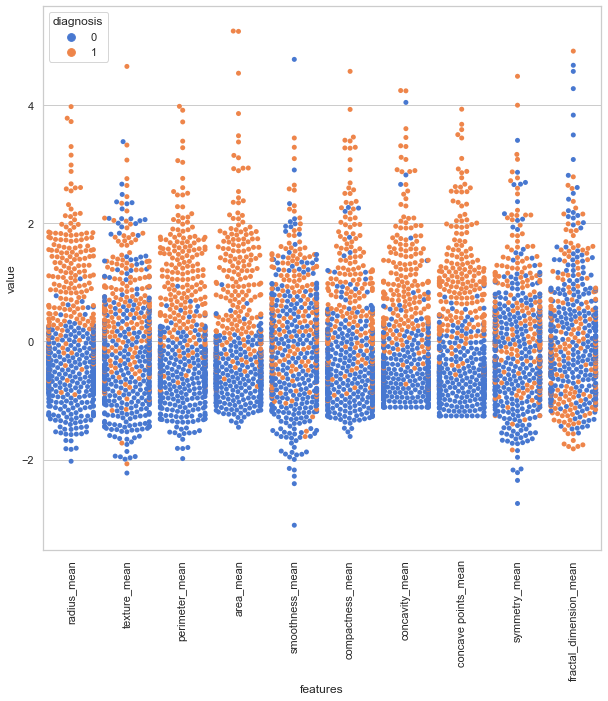

In [ ]:
c = x_mean

sns.set(style="whitegrid", palette="muted")
data_dia = c.iloc[:,0]
data = c
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)
plt.show()

#### Swarm plot for se variables 

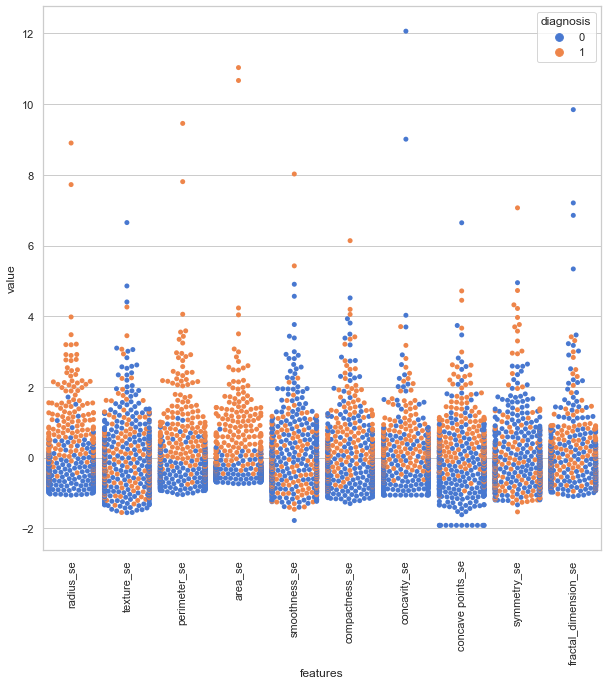

In [ ]:
c = x_se

sns.set(style="whitegrid", palette="muted")
data_dia = c.iloc[:,0]
data = c
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)
plt.show()

#### Swarm plot for worst variables 

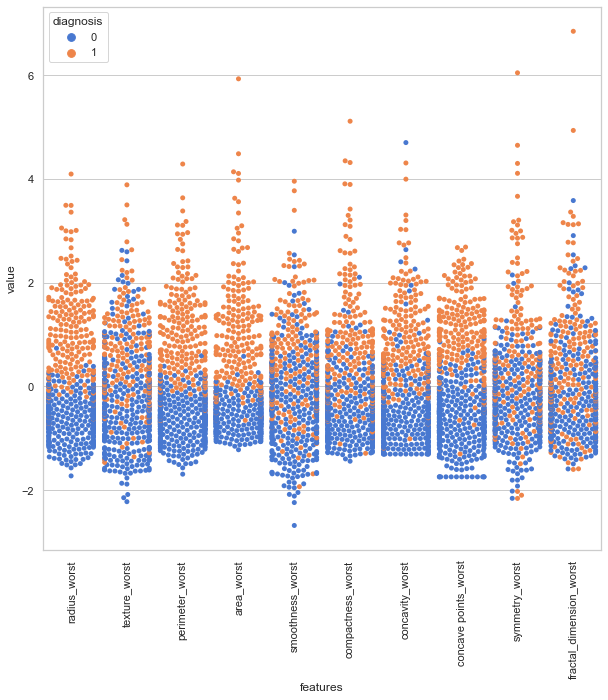

In [ ]:
c = x_worst

sns.set(style="whitegrid", palette="muted")
data_dia = c.iloc[:,0]
data = c
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)
plt.show()

## Feature selection

Feature selection is the process of reducing the number of input variables when developing a predictive model.
It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases,
 to improve the performance of the model. From our visulations we now need to pick some features run our models on.
 For more information on feature selection click [here](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/).
 We will first run feature selection for our mean cases 

 We need to look at features that have strong correlations and group them together. 

For example radius_mean, perimeter_mean, area_mean are all highly correlated. Having grouped these variables together we only need to use perimeter_mean instead of all three variables.

Try and group the other remaining variables and pick 4 other variables that you can use as prediction variables. Set up an array of the variables you have chosen as your prediction variables.



In [ ]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean','concavity_mean',
'texture_se','perimeter_se','smoothness_se','compactness_se','symmetry_se','concavity_se',
'texture_worst','perimeter_worst','smoothness_worst','compactness_worst','symmetry_worst','concavity_worst']

## Making predictions

“Prediction” refers to the output of an algorithm after it has been trained on a historical dataset and applied to new data when forecasting
the likelihood of a particular outcome. In our case we will be splitting our data into training and testing data from
 
 which we will use our prediction variables to make judgements on whether or not an image shows benign or malignant cancer cells.
 We split the data into train and test to avoid overfitting where our machine learning model performs really well on data it has seen 
 but fails when shown any new data. Underfitting can also occur where the train data is of poor quality.
To read more about machine learning and predictions click [here](https://www.datarobot.com/wiki/prediction/).
To read more on train/test click 
[here](https://towardsdatascience.com/how-to-split-a-dataset-into-training-and-testing-sets-b146b1649830#:~:text=The%20simplest%20way%20to%20split,the%20performance%20of%20our%20model.).

Before we get started with splitting the data we need to install a few packages.

In [ ]:
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn import tree

### Splitting into train/test 

Let's now split our dataset up into train and test datasets. A good ratio to split into is 80:20 train to test. The training dataset will 
be used to train the model to predict expected diagnosis from our selected features.
The test dataset will be used to test how well the trained model can predict the correct diagnosis.

[Follow this guide on how to split the data](https://towardsdatascience.com/splitting-a-dataset-e328dab2760a)

In [ ]:
#now split our data into train and test
train, test = train_test_split(x, test_size = 0.2)# in this our main data is split into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(455, 31)
(114, 31)


We need to split again into train_X and train_Y as well as test_X and test_Y. The X variable being the prediction variables and 
the Y variable being the variable we want to predict.

In [ ]:
train_X = train[prediction_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test data

n_features = train_X.shape[1]

Now we can do the rescaling. We will use Scikitlearn's `StandardScaler` for this purposes. The training data will be rescaled using `fit_transform`, while we will use `transform` for the test data to prevent data "leakage". `fit_transform` computes the mean and variance for the training dataset, then rescales the data according to these parameters. `transform` meanwhile, _reuses those parameters, instead of refitting them on the test dataset_. Why is this important? If we use `fit_transform` again, we will calculate a new mean and variance, and let our model learn about the new test dataset. We will therefore not get a good understanding of how the model is behaving on completely unseen data!

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

## Machine learning models 

### Random Forest Classifiers 

Now our data has been split we need to select some models we can train and use to predict. We will start off by looking at a random 
forest classifier. 

If the words machine learning scares you don't worry as it might not be as difficult as you first think. We will use the 
 [sklearn libary](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to 
access these models so very little programming will be needed!

A random forest classifier like its name implies, consists of a large number of individual decision trees that operate as an ensemble 
An error from an individual decision tree is negated as the results of the whole are averaged out to come to a correct decision.
Decisions trees are very sensitive to the data they are trained on — small changes to the training set can result in significantly 
different tree structures. Random forest takes advantage of this by allowing each individual tree to randomly sample from the dataset
 with replacement, resulting in different trees. This process is known as bagging. Please take some time to read 
[this post](https://towardsdatascience.com/understanding-random-forest-58381e0602d2) for a more in depth look at random forest classifiers.


In [ ]:
rf=RandomForestClassifier(n_estimators=50)# a simple random forest model
rf.fit(train_X,train_y)# now fit our model for traiing data
prediction=rf.predict(test_X)# predict for the test data

accuracy = metrics.accuracy_score(prediction,test_y)
err = 1 - accuracy
print("Prediction Accuracy = {0:4.2f}%".format(accuracy*100))
print("Prediction Error = {0:4.2f}%".format(err*100))

### Feature importance
Random forests also provide feature importance.

In [ ]:
importance_threshold = 0.02
for i, (feature, importance) in enumerate(zip(prediction_var,
                                              rf.feature_importances_)):

    if importance > importance_threshold:
        print('[{0}] {1} (score={2:4.3f})'.format(i, feature, importance))

We can then plot these feature importances

In [ ]:
def get_feature_importance(n_features, importances, vars):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

    # Identify the important features
    importance_threshold = 0.02
    idx = np.array(range(n_features))
    imp = np.where(importances >= importance_threshold)  # important features
    rest = np.setdiff1d(idx, imp)  # remaining features

    # Plot the important features and the rest on a bar chart
    plt.bar(idx[imp], importances[imp], alpha=0.65)
    plt.bar(idx[rest], importances[rest], alpha=0.45)

    # Print feature names on the bar chart
    for i, (feature, importance) in enumerate(zip(vars, importances)):
        if importance > importance_threshold:
            plt.text(i, 0.015, feature, ha='center', va='bottom', rotation='vertical', fontsize=16, fontweight='bold')
            print('[{0}] {1} (score={2:4.3f})'.format(i, feature, importance))
        else:
            plt.text(i, 0.01, feature, ha='center', va='bottom', rotation='vertical', fontsize=16, color='gray')
        
    # Finish the plot    
    fig.axes[0].get_xaxis().set_visible(False)
    plt.ylabel('Feature Importance Score', fontsize=16)
    plt.xlabel('Features for Breast Cancer Diagnosis', fontsize=16)
    plt.show()

get_feature_importance(n_features, rf.feature_importances_, prediction_var)

### Individual Prediction 

Now lets try making an individual prediction based off the model we have just set up. In the space below create an individual example 
 from your test data for both X and Y variables. They should be from the same index in your data.
Then use your model to make a prediction. And see if it is correct! Try lots of different individual records and see how many predictions 
 are correct.

In [ ]:
individual_X = test_X[1:2] # taking 1 value
individual_Y = test_y[1:2]

# Our prediction
print("Predicted diagnosis = {0}".format(rf.predict(individual_X)[0]))
print("True diagnosis = {0}".format(individual_Y.to_numpy()[0]))


Predicted diagnosis = 1
True diagnosis = 1


### SVM (Support Vector Model)

An SVM or Support Vector Model finds a hyperplane (a line) in an N-dimensional space (N — the number of features) that 
distinctly classifies the data points. For a high level overview of SVM please read this 
 [article](https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989).  

 [For the relevant code for an SVM click here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
 The same as before try setting up the model and running the model on individual observations in your test data. 
 Are the number of correct observations higher for this model or lower?


### Decision trees

Decision trees are another method of prediction. The aim is to be able to predict a value by learning simple decision rules from data features. 

To find the code and to learn more read here: https://scikit-learn.org/stable/modules/tree.html. It runs through similar steps to the last two models. 


#### Once you have had an attempt at prediction have a go at drawing our decision tree

to resize the plot please use: <code> fig, axe = plt.subplots(figsize=(30,20)) </code>

## Improving Prediction Accuracy 
 

Now you have hopefully been able to get a working machine learning model up and running you may have noticed that some predictions have
 been inaccurate. If we had to use this in a real medical scenario this would be a disaster! Thankfully there are many ways we can 
 improve our machine learning models to make sure they provide accurate diagnoses. Here are a couple:

* Using larger and more complex data in your training set. 
* Testing multiple algorithms. (You have already done this!) 

### [Hyperparameterisation](https://www.jeremyjordan.me/hyperparameter-tuning/)
 

Hyperparameters are the parameters in machine learning models that determine how they work. These parameters can include things like 
the number of layers in a deep neural network, or how many trees there should be in an ensemble model. You usually need to adjust
 these hyperparameters yourself because they aren’t automatically set when you train your model. In true machine learning fashion, 
 we'll ideally ask the machine to perform this exploration and select the optimal model architecture automatically and thus this 
 process of searching for the ideal model architecture is referred to as hyperparameter tuning.

### [Oversampling](https://towardsdatascience.com/oversampling-and-undersampling-5e2bbaf56dcf)

Random Oversampling includes selecting random examples from the minority class with replacement and supplementing the training data 
with multiple copies of this instance, hence it is possible that a single instance may be selected multiple times. For Machine Learning 
algorithms affected by skewed distribution, such as artificial neural networks and SVMs, this is a highly effective technique.

###  [Ensemble methods.](https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c)
 

Another approach is to use an ensemble method, which combines two or more algorithms together into one model. Ensembles are often 
 more accurate than any individual algorithm because they leverage the strengths of each and compensate for their weaknesses.

In other words, if you combine multiple weak learners (i.e., models that perform poorly on their own) into one ensemble, you can get 
 a stronger learner (i.e., a model that performs well as an individual).

### [Cross validation.](https://machinelearningmastery.com/k-fold-cross-validation/) 
 

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. 
 As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k 
 in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. 
That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions 
 on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic 
estimate of the model skill than other methods, such as a simple train/test split.


## Congratulations! You have completed the DSC data challenge 2022!

We hope you have been able to learn something new today that can potentially be used in hackathons that you may join in future and 
has opened up the world of data science to you! We have outlined a basic pipeline for building and applying machine learning models, but this is just the basics --- much more can be done. We've also included some extra things for you to try!


## Extra: Model selection

We've tried out a random forest classifier, as well as an SVM... what about another kind of model? What is the best way of figuring out what model to use? Well, one way is just to try lots out!


In [ ]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Most of these are from SKLearn, however xgboost is also really good!
classifiers = {
    "XGBClassifier": XGBClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GaussianProcessClassifier": GaussianProcessClassifier(),
    "LogisticRegression": LogisticRegression(),
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    "GaussianNB": GaussianNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
}

Next, we will loop over each model, fit the data using `train_X` and `train_y`, generate predictions using `test_X` and `test_y` and calculate the accuracy across multiple rounds of cross-validation to get an unbiased estimate of each models performance.

In [ ]:
from sklearn.model_selection import cross_val_score

df_models = pd.DataFrame(columns=['model', 'run_time', 'accuracy', 'accuracy_cv'])

for key in classifiers:

    print('Running {0}...'.format(key))

    start_time = time.time()

    classifier = classifiers[key]
    model = classifier.fit(train_X, train_y)
    pred_y = model.predict(test_X)

    scores = cross_val_score(model, 
                             train_X, 
                             train_y,
                             scoring = "accuracy", 
                             cv = 10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'accuracy': metrics.accuracy_score(pred_y, test_y),
           'accuracy_cv': np.mean(scores)
    }

    df_models = df_models.append(row, ignore_index=True)

Running XGBClassifier...
Running RandomForestClassifier...
Running DecisionTreeClassifier...
Running GaussianProcessClassifier...
Running LogisticRegression...
Running PassiveAggressiveClassifier...
Running GaussianNB...
Running KNeighborsClassifier...


Lets have a look at the performance!

In [ ]:
df_models.sort_values(by='accuracy_cv', ascending=False)

,model,run_time,accuracy,accuracy_cv
4,LogisticRegression,0.0,0.973684,0.975942
5,PassiveAggressiveClassifier,0.0,0.973684,0.962705
0,XGBClassifier,0.01,0.982456,0.960531
3,GaussianProcessClassifier,0.01,0.982456,0.960531
1,RandomForestClassifier,0.02,0.982456,0.958261
7,KNeighborsClassifier,0.0,0.973684,0.947440
2,DecisionTreeClassifier,0.0,0.973684,0.934106
6,GaussianNB,0.0,0.938596,0.923188


## Extra: Hyperparameter tuning

To finish our challenge why not try some hyperparameter tuning yourself. 
 [Check out this article for a guide on this.](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

Our best performing models were the logistic regression and the XGBoost classifier. These are just the models with default parameters though. Do we have any more room to improve if we optimise them?

The first step is to understand what parameters are available, and which can be optimised. You can do this by printing `model.get_params()`, however you may need to look at the documentation for your particular model to understand how it can be tuned.


In [ ]:
classifier = XGBClassifier()
model = classifier.fit(train_X, train_y)
model.get_params()


{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

Next, take a subset of the hyperparameters and add them to a dictionary and assign this to a param_grid.

We can then define the model and configure the `GridSearchCV` function to test each unique combination of hyperparameters and record the accuracy on each iteration. After going through the whole batch, the optimum model parameters can be printed.

In [ ]:
param_grid = dict(
    n_jobs = [16],
    learning_rate = [0.1, 0.5],
    objective = ['binary:logistic'],
    max_depth = [int(x) for x in np.linspace(1, 21, num = 11)], 
    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)],
    subsample = [0.2, 0.8, 1.0],
    gamma = [0, 0.05, 0.5],
    scale_pos_weight = [0, 1],
    reg_alpha = [0, 0.5],
    reg_lambda = [1, 0],
)

model = XGBClassifier(random_state=1, verbosity=1)

from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_grid,
    scoring = 'accuracy',
    n_iter = 100,
    cv = 10, 
    verbose = 1, 
    random_state = 42, 
    n_jobs = -1)


best_model = random_search.fit(train_X, train_y)
print('Optimum parameters', best_model.best_params_)

Optimum parameters {'subsample': 0.8, 'scale_pos_weight': 1, 'reg_lambda': 0, 'reg_alpha': 0.5, 'objective': 'binary:logistic', 'n_jobs': 16, 'n_estimators': 1788, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.05}


In [ ]:
classifier = XGBClassifier(
    gamma = 0,
    learning_rate = 0.5,
    max_depth = 3,
    n_estimators = 1155,
    n_jobs = 16,
    objective = 'binary:logistic',
    subsample = 1.0,
    scale_pos_weight = 1,
    reg_alpha = 0,
    reg_lambda = 1
)

model = classifier.fit(train_X, train_y)
y_pred = model.predict(test_X)
accuracy = metrics.accuracy_score(y_pred, test_y)
err = 1 - accuracy

print("Prediction Accuracy = {0:4.2f}%".format(accuracy*100))
print("Prediction Error = {0:4.2f}%".format(err*100))

Prediction Accuracy = 97.37%
Prediction Error = 2.63%


We've gotten our prediction accuracy up to 98%! That's definitely an improvement on the default parameters!

## Extra: Ensemble methods

We've tried out using a _single_ model, but what happens when multiple models join forces?

In [ ]:
classifiers = {
    "XGBClassifier": XGBClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GaussianProcessClassifier": GaussianProcessClassifier(),
    "LogisticRegression": LogisticRegression(),
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    "GaussianNB": GaussianNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
}

def fit(classifiers, X, y):
    for model, classifier in classifiers.items():
        classifier.fit(X, y)
    return classifiers

Let's also set aside some data for validation

In [ ]:

new_train_X, val_X, new_train_y, val_y = train_test_split(train_X, train_y, test_size=0.25)        # Set aside 25% of data for validation

In [ ]:
classifiers = fit(classifiers, new_train_X, new_train_y)

Given we have 8 individual "base" classifiers, each test example will end up with 8 different predictions, each one corresponding to an associated base classifier.

We are not just interested in the diagnosis itself, but also the probabilities for the diagnosis. Lets make a function that returns the predictions for each classifier, and allows us to specify whether we want the class label or the probability as an output.

In [ ]:
def predict_individual(X, classifiers, prob=False):
    n_classifiers = len(classifiers.keys())
    n_samples = X.shape[0] 

    y = np.zeros((n_samples, n_classifiers))
    for i, (model, classifier) in enumerate(classifiers.items()):
        if prob:
            y[:, i] = classifier.predict_proba(X)[:, 1]  
        else:
            y[:, i] = classifier.predict(X)              
    return y

# Test with prob=False to get the labels
individual_y = predict_individual(test_X, classifiers, prob=False)

# Sanity check that the output has the same number of examples as the test dataset, and 8 estimates, and is 1 or 0
print(test_X.shape)
print(individual_y.shape)
print(individual_y[0])

(114, 18)
(114, 8)
[1. 1. 1. 1. 1. 1. 1. 1.]


Now there are a few different ways of combining these. We will try a few out here:

1) Majority vote: simply pick the most common label from each set of the predictions

2) Accuracy weighting: higher performing classifiers are given greater weight in the ensemble

3) Entropy weighting: similar to above, except entropy is used in deciding the weighting (where entropy is a form of uncertainty)

We can write some helper functions to apply these methods. Have a read of the code below and make sure you understand what they are doing!

In [ ]:
from scipy.stats import mode

def combine_using_majority_vote(X, classifiers):
    y_individual = predict_individual(X, classifiers, prob=False)
    y_final = mode(y_individual, axis=1)
    return y_final[0].reshape(-1, )

def combine_using_accuracy_weighting(X, classifiers, Xval, yval):
    n_classifiers = len(classifiers)
    yval_individual = predict_individual(Xval, classifiers, prob=False)
    
    wts = [metrics.accuracy_score(yval, yval_individual[:, i]) 
       for i in range(n_classifiers)] 
    wts /= np.sum(wts)

    ypred_individual = predict_individual(X, classifiers, prob=False)
    y_final = np.dot(ypred_individual, wts) 

    return np.round(y_final)

# For entropy weighting first define how to calculate entropy
def entropy(y):
    _, counts = np.unique(y, return_counts=True) 
    p = np.array(counts.astype('float') / len(y))
    ent = -p.T @ np.log2(p) # @ is the matrix multiplication operator

    return ent

def combine_using_entropy_weighting(X, classifiers, Xval, yval):
    n_classifiers = len(classifiers)
    yval_individual = predict_individual(Xval, classifiers, prob=False)
    
    wts = [1/entropy(yval_individual[:, i]) 
           for i in range(n_classifiers)]
    wts /= np.sum(wts)

    ypred_individual = predict_individual(X, classifiers, prob=False)
    y_final = np.dot(ypred_individual, wts)
    
    return np.round(y_final)

In [ ]:
majority_y_pred = combine_using_majority_vote(test_X, classifiers)
print("Majority Vote Prediction Accuracy = {0:4.2f}%".format(metrics.accuracy_score(test_y, majority_y_pred)*100))

accuracy_weighting_y_pred = combine_using_accuracy_weighting(test_X, classifiers, val_X, val_y)
print("Accuracy weighting Prediction Accuracy = {0:4.2f}%".format(metrics.accuracy_score(test_y, accuracy_weighting_y_pred)*100))

entropy_weighting_y_pred = combine_using_entropy_weighting(test_X, classifiers, val_X, val_y)
print("Entropy weighting Prediction Accuracy = {0:4.2f}%".format(metrics.accuracy_score(test_y, entropy_weighting_y_pred)*100))

Majority Vote Prediction Accuracy = 98.25%
Accuracy weighting Prediction Accuracy = 98.25%
Entropy weighting Prediction Accuracy = 98.25%


We can also do something called meta-learning, where instead of carefully designing a combination function to combine predictions, we will learn a combination function over the individual predictions. That is, the predictions of the base estimators are given as inputs to a second-level learning algorithm. Thus, rather than designing one ourselves, we will learn a second-level meta-classification function!

Stacking is the most common meta-learning method and gets its name because it stacks a second classifier on top of its base estimators. The general stacking procedure has two steps:

1) level 1: fit base estimators on the training data; this step is the same as before and aims to create a diverse, heterogeneous set of base classifiers.
2) level 2: construct a new data set from the output of the base classifiers, which become meta-features; meta-features can either be the predictions or the probability of predictions.

Lets again define our models first:

In [ ]:
classifiers = {
    "XGBClassifier": XGBClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GaussianProcessClassifier": GaussianProcessClassifier(),
    "LogisticRegression": LogisticRegression(),
    "GaussianNB": GaussianNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
}

And then lets define some helper functions to allow us to use a second level.

In [ ]:
# Fit our classifiers
def fit_stacking(level1_classifiers, level2_classifier, X, y, use_probabilities=False):

    fit(level1_classifiers, X, y)
    
    X_meta = predict_individual(X, classifiers=level1_classifiers, prob=use_probabilities)
    
    level2_classifier.fit(X_meta, y)

    final_model = {'level-1': level1_classifiers, 
                   'level-2': level2_classifier, 
                   'use-prob': use_probabilities}
    
    return final_model

# Predict using the classifiers
def predict_stacking(X, stacked_model):
    level1_classifiers = stacked_model['level-1']
    use_probabilities = stacked_model['use-prob']

    X_meta = predict_individual(X, classifiers=level1_classifiers, prob=use_probabilities)

    level2_classifier = stacked_model['level-2']
    y = level2_classifier.predict(X_meta)
    
    return y

Now lets try it out! Logistic Regression is a common second level estimator, but feel free to experiment with different ones yourself.

In [ ]:
meta_classifier = LogisticRegression(C=1.0, solver='lbfgs')

stacking_model = fit_stacking(classifiers, meta_classifier, train_X, train_y, use_probabilities=True)
ypred = predict_stacking(test_X, stacking_model)

print("Meta Learning Prediction Accuracy = {0:4.2f}%".format(metrics.accuracy_score(test_y, ypred)*100))

Meta Learning Prediction Accuracy = 97.37%


As we could see, the accuracy actually is worse than our previous methods, however this is just a basic attempt. We can combine parameter optimisation, incorporate cross validation into the stacking procedure, and many more things to try and increase the accuracy!

All in all, ensemble learning can be a powerful tool to augment your machine learning toolbox!